<a href="https://colab.research.google.com/github/Mihishi/sca-supervised-prediction-model/blob/main/sudden_cardiac_arrest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Step 1: Import Libraries***

In [79]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# ***Step 2: Read Dataset***

In [80]:
sca_df = pd.read_csv('sudden_cardiac_arrest_dataset.csv')
sca_df.shape

(1025, 15)

In [81]:
sca_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,corona_vaccine_name
0,32,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Sinovac
1,35,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Pfizer
2,20,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Johnson & Johnson
3,33,1,0,148,203,0,1,161,0,0.0,2,1,3,0,AstraZeneca
4,30,0,0,138,294,1,1,106,0,1.9,1,3,2,0,AstraZeneca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,22,1,1,140,221,0,1,164,1,0.0,2,0,2,1,AstraZeneca
1021,18,1,0,125,258,0,0,141,1,2.8,1,1,3,0,Pfizer
1022,26,1,0,110,275,0,0,118,1,1.0,1,1,2,0,Sinovac
1023,32,0,0,110,254,0,0,159,0,0.0,2,0,2,1,Moderna


# ***Step 3: Dataset Overview***

### ***Step 3.1: Dataset Basic Information***

In [82]:
sca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1025 non-null   int64  
 1   sex                  1025 non-null   int64  
 2   cp                   1025 non-null   int64  
 3   trestbps             1025 non-null   int64  
 4   chol                 1025 non-null   int64  
 5   fbs                  1025 non-null   int64  
 6   restecg              1025 non-null   int64  
 7   thalach              1025 non-null   int64  
 8   exang                1025 non-null   int64  
 9   oldpeak              1025 non-null   float64
 10  slope                1025 non-null   int64  
 11  ca                   1025 non-null   int64  
 12  thal                 1025 non-null   int64  
 13  target               1025 non-null   int64  
 14  corona_vaccine_name  1025 non-null   object 
dtypes: float64(1), int64(13), object(1)
me

In [83]:
sca_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,corona_vaccine_name
0,32,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Sinovac
1,35,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Pfizer
2,20,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Johnson & Johnson
3,33,1,0,148,203,0,1,161,0,0.0,2,1,3,0,AstraZeneca
4,30,0,0,138,294,1,1,106,0,1.9,1,3,2,0,AstraZeneca


In [84]:
sca_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target',
       'corona_vaccine_name'],
      dtype='object')

In [85]:
print("Number of rows and columns of Training Dataset :", sca_df.shape)

Number of rows and columns of Training Dataset : (1025, 15)


In [86]:
# Define the continuous features
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Identify the features to be converted to object data type
features_to_convert = [feature for feature in sca_df.columns if feature not in continuous_features]

# Convert the identified features to object data type
sca_df[features_to_convert] = sca_df[features_to_convert].astype('object')

sca_df.dtypes

,0
age,int64
sex,object
cp,object
trestbps,int64
chol,int64
fbs,object
restecg,object
thalach,int64
exang,object
oldpeak,float64


### ***Step 3.2: Summary Statistics for Numerical Variables***

In [87]:
#Check statistical values for fields with numerical datatype
sca_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,26.495610,5.165638,18.0,22.0,27.0,31.0,35.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


### ***Step 3.3: Summary Statistics for Categorical Variables***

In [88]:
# Get the summary statistics for categorical variables
sca_df.describe(include='object')

,sex,cp,fbs,restecg,exang,slope,ca,thal,target,corona_vaccine_name
count,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025
unique,2,4,2,3,2,3,5,4,2,5
top,1,0,0,1,0,1,0,2,1,AstraZeneca
freq,713,497,872,513,680,482,578,544,526,219


# ***Step 4: EDA***

## *Step 4.1: Univariate Analysis*

### Step 4.1.1 | Numerical Variables Univariate Analysis

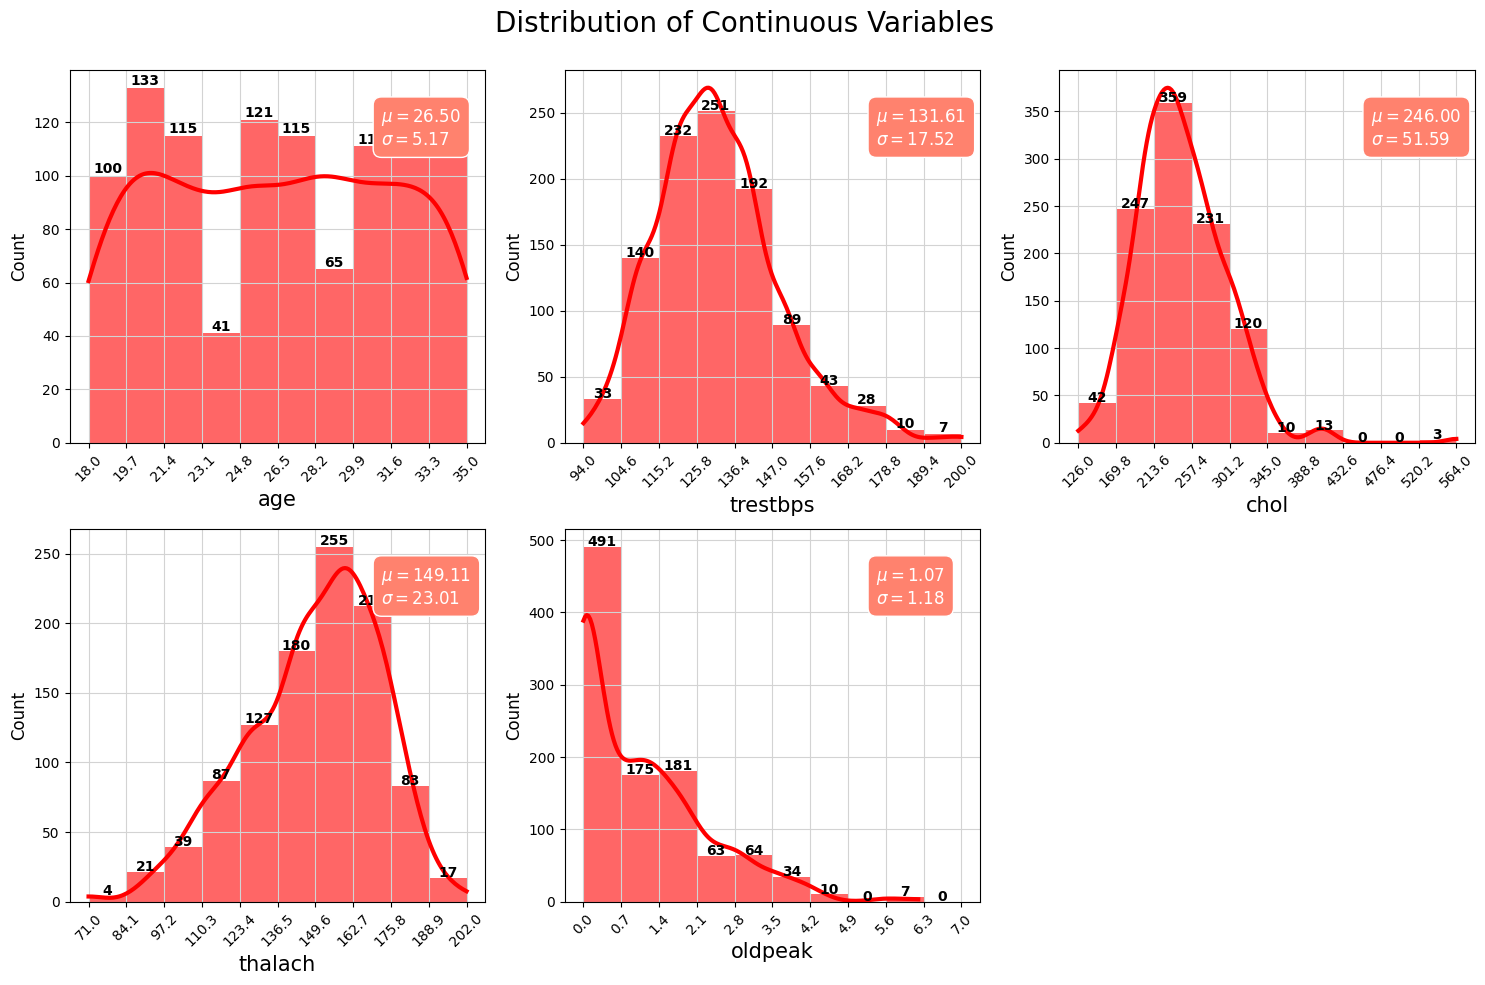

In [89]:
# Filter out continuous features for the univariate analysis
df_continuous = sca_df[continuous_features]

# Set up the subplot
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Loop to plot histograms for each continuous feature
for i, col in enumerate(df_continuous.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_continuous[col],
                                     range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max())))

    graph = sns.histplot(data=df_continuous, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='red', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Count', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')

    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")

    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous[col].mean(),
        r'$\sigma=%.2f$' % df_continuous[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Distribution of Continuous Variables', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

### *Step 4.1.2: Categorical Variables Univariate Analysis*

In [90]:
# Filter out categorical features for the univariate analysis
categorical_features = sca_df.columns.difference(continuous_features)
df_categorical = sca_df[categorical_features]

In [91]:
# # Set the resolution of the plotted figures
# plt.rcParams['figure.dpi'] = 200

# # Configure Seaborn plot styles: Set background color and use dark grid
# sns.set(rc={'axes.facecolor': '#faded9'}, style='darkgrid')

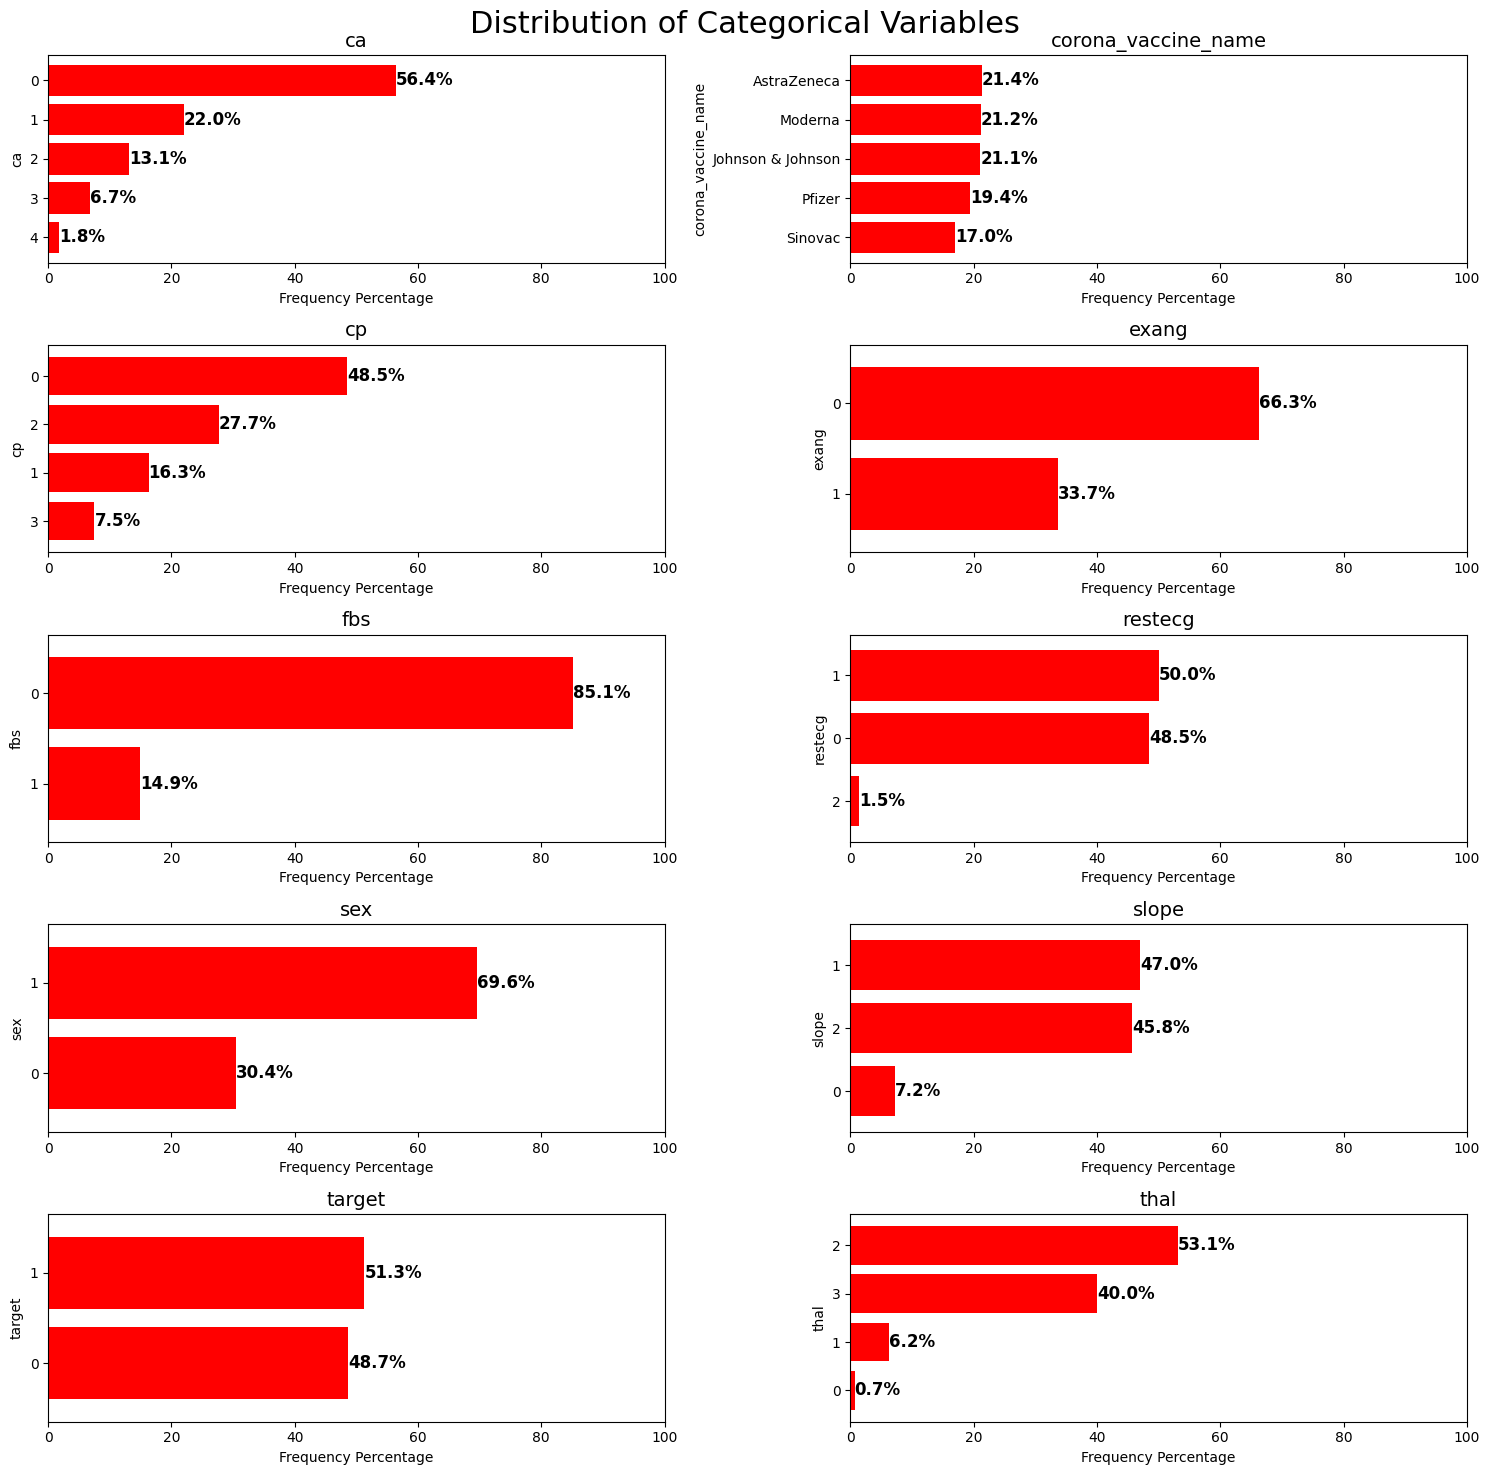

In [92]:
import math
import matplotlib.pyplot as plt

# Identify categorical features
categorical_features = sca_df.columns.difference(continuous_features)
df_categorical = sca_df[categorical_features]

# Define subplot grid size based on number of categorical features
n_features = len(categorical_features)
ncols = 2
nrows = math.ceil(n_features / ncols)

# Create subplots
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 3))

# Ensure ax is a 2D array
ax = np.array(ax).reshape(nrows, ncols)

# Loop through each categorical feature
for i, col in enumerate(categorical_features):
    row = i // ncols
    col_idx = i % ncols

    value_counts = sca_df[col].value_counts(normalize=True).mul(100).sort_values()
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8, color='red')

    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value, index, str(round(value, 1)) + '%',
                              fontsize=12, weight='bold', va='center')

    ax[row, col_idx].set_xlim([0, 100])
    ax[row, col_idx].set_xlabel('Frequency Percentage')
    ax[row, col_idx].set_title(f'{col}', fontsize=14)

# Turn off any unused axes
for i in range(n_features, nrows * ncols):
    row = i // ncols
    col_idx = i % ncols
    ax[row, col_idx].axis('off')

# Final adjustments
plt.suptitle('Distribution of Categorical Variables', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


## *Step 4.2: Bivariate Analysis*

*Step 4.2.1: Numerical Features vs Target*

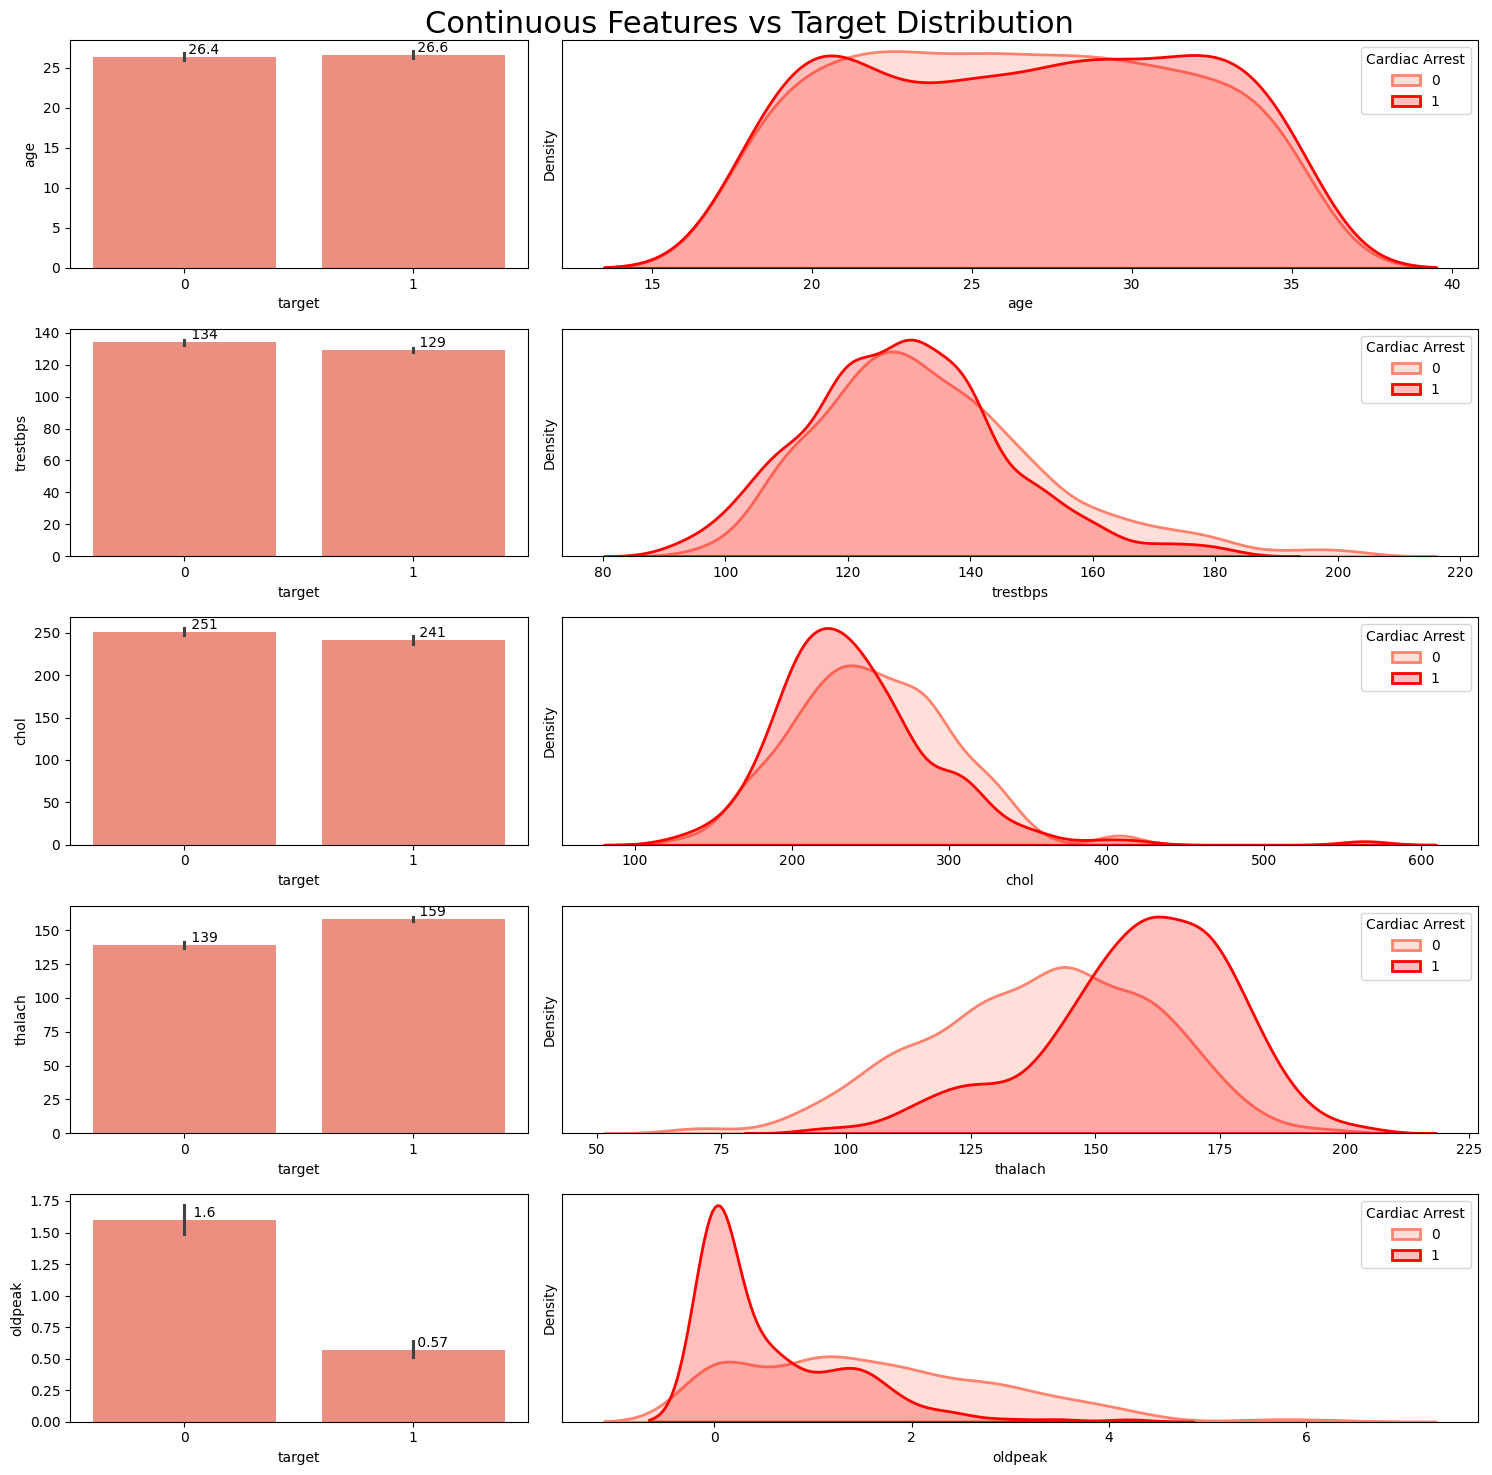

In [93]:
# Set color palette
sns.set_palette(['#ff826e', 'red'])

# Create the subplots
fig, ax = plt.subplots(len(continuous_features), 2, figsize=(15,15), gridspec_kw={'width_ratios': [1, 2]})

# Loop through each continuous feature to create barplots and kde plots
for i, col in enumerate(continuous_features):
    # Barplot showing the mean value of the feature for each target category
    graph = sns.barplot(data=sca_df, x="target", y=col, ax=ax[i,0])

    # KDE plot showing the distribution of the feature for each target category
    sns.kdeplot(data=sca_df[sca_df["target"]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=sca_df[sca_df["target"]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Cardiac Arrest', loc='upper right')

    # Add mean values to the barplot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')

# Set the title for the entire figure
plt.suptitle('Continuous Features vs Target Distribution', fontsize=22)
plt.tight_layout()
plt.show()

### Step 4.2.2: Categorical Features vs Target

In [94]:
# Remove 'target' from the categorical_features
categorical_features = [feature for feature in categorical_features if feature != 'target']

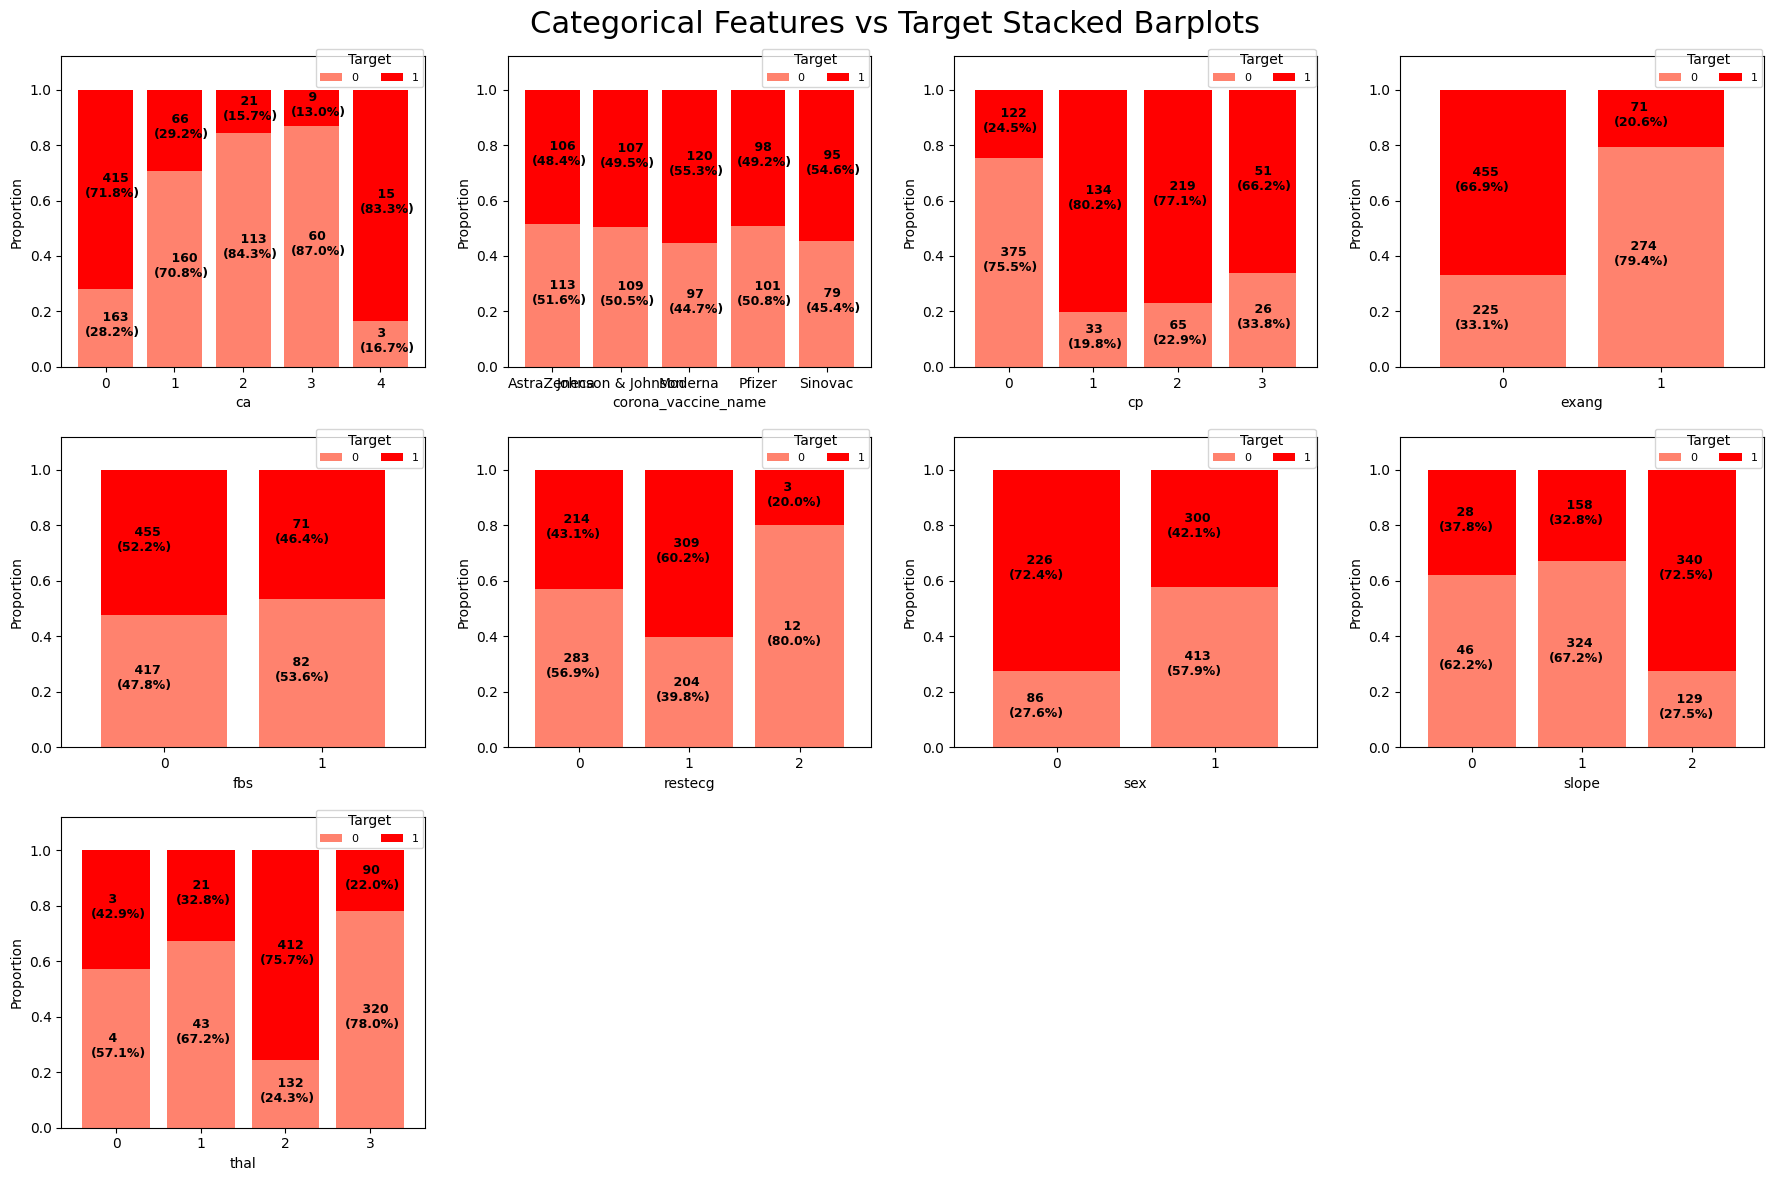

In [95]:
import math
from matplotlib.colors import ListedColormap

# Remove target column from the categorical features
categorical_features = [feature for feature in categorical_features if feature != 'target']

# Dynamically calculate rows and columns
n_features = len(categorical_features)
ncols = 4
nrows = math.ceil(n_features / ncols)

# Create subplot grid
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, nrows * 4))
ax = np.array(ax).reshape(nrows, ncols)

# Loop through features
for i, col in enumerate(categorical_features):
    x, y = i // ncols, i % ncols

    cross_tab = pd.crosstab(index=sca_df[col], columns=sca_df['target'])
    cross_tab_prop = pd.crosstab(index=sca_df[col], columns=sca_df['target'], normalize='index')

    cmp = ListedColormap(['#ff826e', 'red'])

    cross_tab_prop.plot(kind='bar', ax=ax[x, y], stacked=True, width=0.8,
                        colormap=cmp, legend=False, ylabel='Proportion')

    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],
                                                   cross_tab.loc[val],
                                                   cross_tab_prop.loc[val].cumsum()):
            ax[x, y].text(x=idx-0.3, y=(y_location - proportion) + (proportion / 2) - 0.03,
                          s=f'    {count}\n({np.round(proportion * 100, 1)}%)',
                          color="black", fontsize=9, fontweight="bold")

    ax[x, y].legend(title='Target', loc=(0.7, 0.9), fontsize=8, ncol=2)
    ax[x, y].set_ylim([0, 1.12])
    ax[x, y].set_xticklabels(ax[x, y].get_xticklabels(), rotation=0)

# Turn off unused axes
for i in range(n_features, nrows * ncols):
    row, col = i // ncols, i % ncols
    ax[row, col].axis('off')

plt.suptitle('Categorical Features vs Target Stacked Barplots', fontsize=22)
plt.tight_layout()
plt.show()


# ***Step 5: Data Preprocessing***

## Step 5.1: Irrelevant Features Removal

## *Step 5.2: Missing Value Treatment*

In [96]:
# Check for missing values in the dataset
sca_df.isnull().sum().sum()

np.int64(0)

Upon our above inspection, it is obvious that there are no missing values in our dataset. This is ideal as it means we don't have to make decisions about imputation or removal, which can introduce bias or reduce our already limited dataset size.

## *Step 5.3: Outlier Treatment*

In [97]:
continuous_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [98]:
Q1 = sca_df[continuous_features].quantile(0.25)
Q3 = sca_df[continuous_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((sca_df[continuous_features] < (Q1 - 1.5 * IQR)) | (sca_df[continuous_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

,0
age,0
trestbps,30
chol,16
thalach,4
oldpeak,7


Upon identifying outliers for the specified continuous features, we found the following:

Education: No outliers
BMI:9847
PhysHlth: 40949
Age: No outliers

In [99]:
sca_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,corona_vaccine_name
0,32,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Sinovac
1,35,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Pfizer
2,20,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Johnson & Johnson
3,33,1,0,148,203,0,1,161,0,0.0,2,1,3,0,AstraZeneca
4,30,0,0,138,294,1,1,106,0,1.9,1,3,2,0,AstraZeneca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,22,1,1,140,221,0,1,164,1,0.0,2,0,2,1,AstraZeneca
1021,18,1,0,125,258,0,0,141,1,2.8,1,1,3,0,Pfizer
1022,26,1,0,110,275,0,0,118,1,1.0,1,1,2,0,Sinovac
1023,32,0,0,110,254,0,0,159,0,0.0,2,0,2,1,Moderna


## Step 5.4:*italicized text* Categorical Features Encoding

In [100]:
from sklearn.preprocessing import LabelEncoder

# Implementing one-hot encoding on the specified categorical features
df_encoded = pd.get_dummies(sca_df, columns=['slope'], drop_first=True)

# Apply Label Encoding to 'corona_vaccine_name'
le = LabelEncoder()
df_encoded['corona_vaccine_name'] = le.fit_transform(df_encoded['corona_vaccine_name'].astype(str))
print(df_encoded[['corona_vaccine_name']].head())


# Convert the rest of the categorical variables that don't need one-hot encoding to integer data type
features_to_convert = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'ca', 'thal', 'target']
for feature in features_to_convert:
    df_encoded[feature] = df_encoded[feature].astype(int)

df_encoded.dtypes

   corona_vaccine_name
0                    4
1                    3
2                    1
3                    0
4                    0


,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [101]:
# Displaying the resulting DataFrame after one-hot encoding
df_encoded.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,target,corona_vaccine_name,slope_1,slope_2
0,32,1,0,125,212,0,1,168,0,1.0,2,3,0,4,False,True
1,35,1,0,140,203,1,0,155,1,3.1,0,3,0,3,False,False
2,20,1,0,145,174,0,1,125,1,2.6,0,3,0,1,False,False
3,33,1,0,148,203,0,1,161,0,0.0,1,3,0,0,False,True
4,30,0,0,138,294,1,1,106,0,1.9,3,2,0,0,True,False


## *Step 5.5: Feature Scaling*

Feature Scaling is a crucial preprocessing step for algorithms that are sensitive to the magnitude or scale of features. Models like SVM, KNN, and many linear models rely on distances or gradients, making them susceptible to variations in feature scales. Scaling ensures that all features contribute equally to the model's decision rather than being dominated by features with larger magnitudes.

## Step 5.6: Transforming Skewed Features

In [102]:
# Define the features (X) and the output labels (y)
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

In [103]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [104]:
continuous_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [105]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,corona_vaccine_name,slope_1,slope_2
397,31,1,0,110,167,0,0,114,1,2.0,0,3,0,True,False
687,28,1,0,125,300,0,0,171,0,0.0,2,3,2,False,True
909,19,1,0,144,200,0,0,126,1,0.9,0,3,0,True,False
153,35,1,2,120,258,0,0,147,0,0.4,0,3,3,True,False
373,29,1,1,120,284,0,0,160,0,1.8,0,2,2,True,False


# ***Step 6: Decision Tree Model Building***

Step 6.1: DT Base Model Definition

In [106]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score

dt_base = DecisionTreeClassifier(random_state=0)

## Step 6.2: DT Hyperparameter Tuning

In [107]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train, scoring='recall', n_splits=3):
    '''
    This function optimizes the hyperparameters for a classifier by searching over a specified hyperparameter grid.
    It uses GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters.
    The combination with the highest recall for class 1 is selected as the default scoring metric.
    The function returns the classifier with the optimal hyperparameters.
    '''

    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    best_hyperparameters = clf_grid.best_params_

    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_, best_hyperparameters

In [108]:
# Hyperparameter grid for DT
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2]
}

In [109]:
# Call the function for hyperparameter tuning
best_dt, best_dt_hyperparams = tune_clf_hyperparameters(dt_base, param_grid_dt, X_train, y_train)

In [110]:
print('DT Optimal Hyperparameters: \n', best_dt_hyperparams)

DT Optimal Hyperparameters: 
 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


## Step 6.3: Decision Tree Model Evaluation

In [111]:
# Evaluate the optimized model on the train data
print(classification_report(y_train, best_dt.predict(X_train)))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84       399
           1       0.83      0.91      0.86       421

    accuracy                           0.85       820
   macro avg       0.86      0.85      0.85       820
weighted avg       0.86      0.85      0.85       820



In [112]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83       100
           1       0.81      0.92      0.86       105

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205



In [113]:
def evaluate_model(model, X_test, y_test, model_name):
    """
    Evaluates the performance of a trained model on test data using various metrics.
    """
    # Make predictions
    y_pred = model.predict(X_test)

    # Get classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Extracting metrics
    metrics = {
        "precision_0": report["0"]["precision"],
        "precision_1": report["1"]["precision"],
        "recall_0": report["0"]["recall"],
        "recall_1": report["1"]["recall"],
        "f1_0": report["0"]["f1-score"],
        "f1_1": report["1"]["f1-score"],
        "macro_avg_precision": report["macro avg"]["precision"],
        "macro_avg_recall": report["macro avg"]["recall"],
        "macro_avg_f1": report["macro avg"]["f1-score"],
        "accuracy": accuracy_score(y_test, y_pred)
    }

    # Convert dictionary to dataframe
    df = pd.DataFrame(metrics, index=[model_name]).round(2)

    return df

In [114]:
dt_evaluation = evaluate_model(best_dt, X_test, y_test, 'DT')
dt_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
DT,0.91,0.81,0.77,0.92,0.83,0.86,0.86,0.85,0.85,0.85


# ***Step 7: Random Forest Model Building***

## Step 7.1: RF Base Model Definition

In [115]:
from sklearn.ensemble import RandomForestClassifier

rf_base = RandomForestClassifier(random_state=0)

## Step 7.2: RF Hyperparameter Tuning

In [116]:
param_grid_rf = {
    'n_estimators': [10, 30, 50, 70, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
    'bootstrap': [True, False]
}

In [117]:
# Using the tune_clf_hyperparameters function to get the best estimator
best_rf, best_rf_hyperparams = tune_clf_hyperparameters(rf_base, param_grid_rf, X_train, y_train)
print('RF Optimal Hyperparameters: \n', best_rf_hyperparams)

RF Optimal Hyperparameters: 
 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}


## Step 7.3: RF Model Evaluation

In [118]:
# Evaluate the optimized model on the train data
print(classification_report(y_train, best_rf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       399
           1       0.90      0.95      0.92       421

    accuracy                           0.92       820
   macro avg       0.92      0.92      0.92       820
weighted avg       0.92      0.92      0.92       820



In [119]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.86      0.90       100
           1       0.88      0.94      0.91       105

    accuracy                           0.90       205
   macro avg       0.91      0.90      0.90       205
weighted avg       0.90      0.90      0.90       205



In [120]:
rf_evaluation = evaluate_model(best_rf, X_test, y_test, 'RF')
rf_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
RF,0.93,0.88,0.86,0.94,0.9,0.91,0.91,0.9,0.9,0.9


# ***Step 8: KNN Model Building***

## Step 8.1: KNN Base Model Definition

In [122]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the base KNN model and set up the pipeline with scaling
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

## Step 8.2: KNN Hyperparameter Tuning

In [121]:
# Hyperparameter grid for KNN
knn_param_grid = {
    'knn__n_neighbors': list(range(1, 12)),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]  # 1: Manhattan distance, 2: Euclidean distance
}

In [123]:
# Hyperparameter tuning for KNN
best_knn, best_knn_hyperparams = tune_clf_hyperparameters(knn_pipeline, knn_param_grid, X_train, y_train)
print('KNN Optimal Hyperparameters: \n', best_knn_hyperparams)

KNN Optimal Hyperparameters: 
 {'knn__n_neighbors': 1, 'knn__p': 1, 'knn__weights': 'uniform'}


## Step 8.3: KNN Model Evaluation

In [124]:
# Evaluate the optimized model on the train data
print(classification_report(y_train, best_knn.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       399
           1       1.00      1.00      1.00       421

    accuracy                           1.00       820
   macro avg       1.00      1.00      1.00       820
weighted avg       1.00      1.00      1.00       820



In [125]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       100
           1       1.00      0.96      0.98       105

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



In [126]:
knn_evaluation = evaluate_model(best_knn, X_test, y_test, 'KNN')
knn_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
KNN,0.96,1.0,1.0,0.96,0.98,0.98,0.98,0.98,0.98,0.98
